# 6.3 Applying Supervised Learning to Predict Student Dropout

**Welcome to the Project: Predicting Student Dropout with Machine Learning**

In this project, we examine anonymised educational data and use supervised learning techniques to predict whether a student is likely to drop out.  
In higher education, improving student retention is essential for both institutional performance and learner success. A high dropout rate can lead to reduced academic outcomes, lower satisfaction, and financial impact for the provider.

You will work with data in three distinct stages:

1. Applicant and course information  
2. Student engagement data  
3. Academic performance data  

These stages represent the *typical data journey within an education-services context*, illustrating how information becomes available as a learner progresses.  
By exploring each stage, you’ll learn how predictive analytics can highlight early-warning indicators and guide proactive student-support strategies.

Please set aside approximately **12 hours** to complete the mini-project.

---

## Business Context

This project simulates the workflow of an **education-services organisation** that partners with multiple universities to support international students during their academic transition.  
The organisation collects and analyses learner data to improve outcomes, reduce attrition, and support progression into higher-degree study.

It operates several study centres across the UK, helping students adapt to new academic environments by strengthening language, subject, and study skills before progressing to full university programmes.  
The anonymised datasets provided in this project mirror the type of information such institutions typically manage — from initial application data to engagement metrics and academic results.

> ⚠️ *All institution, company, and student identifiers have been removed or replaced with generic placeholders in accordance with data-confidentiality requirements.*

---

## Objective

By the end of this project, you will have developed the skills and knowledge to apply advanced machine-learning techniques to predict student dropout.  
The workflow includes comprehensive data exploration, preprocessing, and feature engineering to prepare high-quality inputs for the models.  
You will then train and compare multiple predictive algorithms — including **XGBoost** and a **neural-network model** — to determine the most effective approach for identifying at-risk students.

In the notebook, you will:
- Explore the three datasets, taking a phased approach.  
- Preprocess and engineer features for modelling.  
- Build and evaluate dropout-prediction models using XGBoost and neural networks.  

You will also prepare a report summarising your findings, insights, and recommendations.

---

## Assessment Criteria

By completing this project, you will demonstrate your ability to:

- Develop accurate predictive models for applied educational data.  
- Inform data-driven decisions using advanced ML algorithms and evaluation metrics.  
- Present effective, interpretable insights derived from preprocessing, model selection, and validation techniques.

---

## Project Guidance

1. Open **Mini-Project 6.3 – Predicting Student Dropout**, and save a copy of the notebook to your workspace.  
2. Follow the rubric and complete all steps specified for analysis, modelling, and interpretation.  
3. When finished:
   - Download your completed notebook as a `.ipynb` file.  
   - Save it as: **LastName_FirstName_CAM_C201_Week_6_Mini-project.ipynb**  
4. Prepare an 800 – 1,000-word report summarising your methodology, analysis, and results.  
   - Save it as: **LastName_FirstName_CAM_C201_W6_Mini-project.pdf**  
5. Submit both the notebook and report for review.

---

> ✅ *This public version has been anonymised. All data shown are synthetic or de-identified, created solely for educational and demonstrative purposes.*


# 6.3 Mini-Project: Predicting Student Dropout using Supervised Learning
**Objective:** Build XGBoost and Neural Network models to predict student dropout using staged data inputs.

This notebook follows a three-stage approach:
- **Stage 1:** Applicant and course data
- **Stage 2:** Engagement metrics added
- **Stage 3:** Academic performance metrics included


##Reproducability


In [1]:
# === Reproducability ===
import random
import numpy as np
import tensorflow as tf

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

#Anonymisation

In [2]:
import numpy as np
import pandas as pd

np.random.seed(42)

# ---------- helpers ----------
def random_dates(n, start="1998-01-01", end="2005-12-31"):
    # returns list of dd/mm/YYYY strings
    dates = pd.date_range(start, end)
    return np.random.choice(dates.strftime("%d/%m/%Y"), n)

def unique_int_ids(n, start=2_000_000, step=1):
    # simple unique numeric IDs
    return np.arange(start, start + n*step, step, dtype=np.int64)

# ---------- sizes ----------
n1 = 300
n2 = n1
n3 = n1

# ---------- shared categorical pools ----------
centres = ["UK_Centre_1", "UK_Centre_2", "UK_Centre_3"]
booking_types = ["Agent", "Direct"]
lead_sources = ["Standard Agent Booking", "Direct Web", "Referral"]
discount_types = [np.nan, "EarlyBird", "Promo10", np.nan]
genders = ["Male", "Female"]
nations = ["Chinese", "Indian", "Nigerian", "Vietnamese", "Saudi"]
home_states = ["Jiangsu", "Punjab", "Lagos", "Hanoi", "Riyadh", np.nan]
home_cities = ["Nanjing", "Chandigarh", "Ikeja", "Hoàn Kiếm", "Riyadh", np.nan]
course_levels = ["Foundation", "Pre-Masters", "Undergraduate Year 2"]
course_names = ["Course_A", "Course_B", "Course_C"]
progression_degrees = [
    "BSc Biological Sciences", "MA Business Management", "MSc International Business",
    "MSc Finance", "BEng Mechanical Engineering", np.nan
]
progression_unis = ["Partner University"]

# =========================
# Stage 1 (16 columns)
# =========================
stage1 = pd.DataFrame({
    "CentreName": np.random.choice(centres, n1),
    "LearnerCode": unique_int_ids(n1),                              # int64
    "BookingType": np.random.choice(booking_types, n1),
    "LeadSource": np.random.choice(lead_sources, n1),
    "DiscountType": np.random.choice(discount_types, n1),
    "DateofBirth": random_dates(n1),                                # dd/mm/YYYY string
    "Gender": np.random.choice(genders, n1),
    "Nationality": np.random.choice(nations, n1),
    "HomeState": np.random.choice(home_states, n1),
    "HomeCity": np.random.choice(home_cities, n1),
    "CourseLevel": np.random.choice(course_levels, n1),
    "CourseName": np.random.choice(course_names, n1),
    "IsFirstIntake": np.random.choice([True, False], n1),           # boolean
    "CompletedCourse": np.random.choice(["Yes", "No"], n1, p=[0.8, 0.2]),
    "ProgressionDegree": np.random.choice(progression_degrees, n1),
    "ProgressionUniversity": np.random.choice(progression_unis, n1)
})

stage1.to_csv("Stage1_data_synthetic.csv", index=False)

# =========================
# Stage 2 (Stage 1 + 2 columns)
# =========================
stage2 = stage1.copy()
stage2["AuthorisedAbsenceCount"] = np.random.randint(0, 6, n2)
stage2["UnauthorisedAbsenceCount"] = np.random.randint(0, 3, n2)

stage2.to_csv("Stage2_data_synthetic.csv", index=False)

# =========================
# Stage 3 (Stage 2 + 3 columns)
# =========================
stage3 = stage2.copy()
stage3["AssessedModules"] = np.random.randint(4, 8, n3)
stage3["PassedModules"]   = np.random.randint(3, 8, n3)
stage3["FailedModules"]   = np.random.randint(0, 2, n3)

stage3.to_csv("Stage3_data_synthetic.csv", index=False)

print("✅ Synthetic datasets written: Stage1_data_synthetic.csv, Stage2_data_synthetic.csv, Stage3_data_synthetic.csv")


✅ Synthetic datasets written: Stage1_data_synthetic.csv, Stage2_data_synthetic.csv, Stage3_data_synthetic.csv


## Stage 1: Applicant and Course Information
Includes demographic and enrolment data to identify risk of dropout before course start.

### Stage 1: Preprocessing

Data shape: (300, 16)


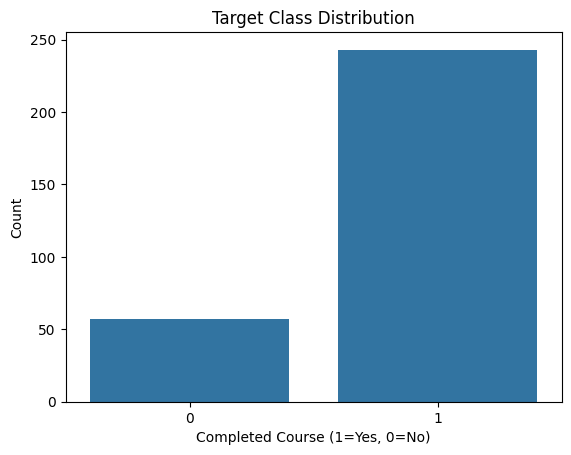

Class distribution:
CompletedCourse
1    0.81
0    0.19
Name: proportion, dtype: float64
Training set: (240, 29)
Test set: (60, 29)


In [3]:

# === Load Stage 1 Data ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the data
Stage1_data = "Stage1_data_synthetic.csv"
df = pd.read_csv(Stage1_data)

# Preview data
print("Data shape:", df.shape)
df.head()

# === Feature Engineering ===

# Convert DateofBirth to Age
df['DateofBirth'] = pd.to_datetime(df['DateofBirth'], dayfirst=True, errors='coerce')
df['Age'] = 2025 - df['DateofBirth'].dt.year

# Drop original DateofBirth
df.drop(columns=['DateofBirth'], inplace=True)

# Convert target variable: CompletedCourse (Yes/No) to binary (1/0)
df['CompletedCourse'] = df['CompletedCourse'].map({'Yes': 1, 'No': 0})

# === Drop Unnecessary Columns ===

# Drop identifier
df.drop(columns=['LearnerCode'], inplace=True)

# Drop high-cardinality columns (>200 unique values)
high_card_cols = [col for col in df.columns if df[col].nunique() > 200]
df.drop(columns=high_card_cols, inplace=True)

# Drop columns with >50% missing values
missing_thresh = 0.5
missing_ratio = df.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > missing_thresh].index
df.drop(columns=cols_to_drop, inplace=True)

# === Check for Class Imbalance ===

sns.countplot(x='CompletedCourse', data=df)
plt.title('Target Class Distribution')
plt.xlabel('Completed Course (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

# Also print value counts
print("Class distribution:")
print(df['CompletedCourse'].value_counts(normalize=True))

# === Encode Categorical Features ===

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# === Train-Test Split ===
X1 = df.drop('CompletedCourse', axis=1)
y1 = df['CompletedCourse']

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42, stratify=y1
)

print("Training set:", X1_train.shape)
print("Test set:", X1_test.shape)


### Stage 1: XGBoost (Baseline and Tuned)

=== Stage 1 Baseline XGBoost Performance ===
Accuracy: 0.7666666666666667
Precision: 0.8181818181818182
Recall: 0.9183673469387755
AUC: 0.5046382189239332
Confusion Matrix:
 [[ 1 10]
 [ 4 45]]

=== Stage 1 Tuned XGBoost Performance ===
Accuracy: 0.7833333333333333
Precision: 0.8214285714285714
Recall: 0.9387755102040817
AUC: 0.5148423005565863
Confusion Matrix:
 [[ 1 10]
 [ 3 46]]


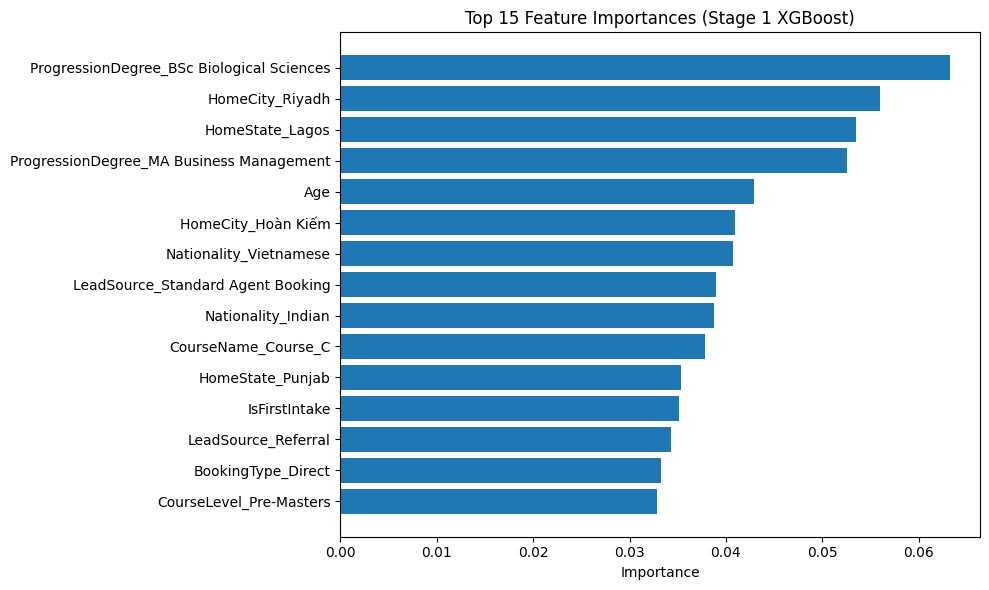

In [4]:
# === Stage 1: XGBoost Model (Baseline) ===
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Instantiate and train the baseline model
xgb1_base = XGBClassifier(eval_metric='logloss', random_state=42)
xgb1_base.fit(X1_train, y1_train)

# Predict and evaluate
y1_pred_base = xgb1_base.predict(X1_test)

print("=== Stage 1 Baseline XGBoost Performance ===")
print("Accuracy:", accuracy_score(y1_test, y1_pred_base))
print("Precision:", precision_score(y1_test, y1_pred_base))
print("Recall:", recall_score(y1_test, y1_pred_base))
print("AUC:", roc_auc_score(y1_test, y1_pred_base))
print("Confusion Matrix:\n", confusion_matrix(y1_test, y1_pred_base))

# === Stage 1: XGBoost Model (After Tuning) ===
xgb1_tuned = XGBClassifier(
    learning_rate=0.05,
    max_depth=5,
    n_estimators=200,
    eval_metric='logloss',
    random_state=42
)
xgb1_tuned.fit(X1_train, y1_train)

# Predict and evaluate
y1_pred_tuned = xgb1_tuned.predict(X1_test)

print("\n=== Stage 1 Tuned XGBoost Performance ===")
print("Accuracy:", accuracy_score(y1_test, y1_pred_tuned))
print("Precision:", precision_score(y1_test, y1_pred_tuned))
print("Recall:", recall_score(y1_test, y1_pred_tuned))
print("AUC:", roc_auc_score(y1_test, y1_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y1_test, y1_pred_tuned))

# === Feature Importance Plot (Stage 1) ===
importances1 = xgb1_tuned.feature_importances_
features1 = X1_train.columns
indices1 = np.argsort(importances1)

plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances (Stage 1 XGBoost)")
plt.barh(range(15), importances1[indices1][-15:], align='center')
plt.yticks(range(15), [features1[i] for i in indices1[-15:]])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


### Stage 1: Neural Network (Baseline and Tuned)

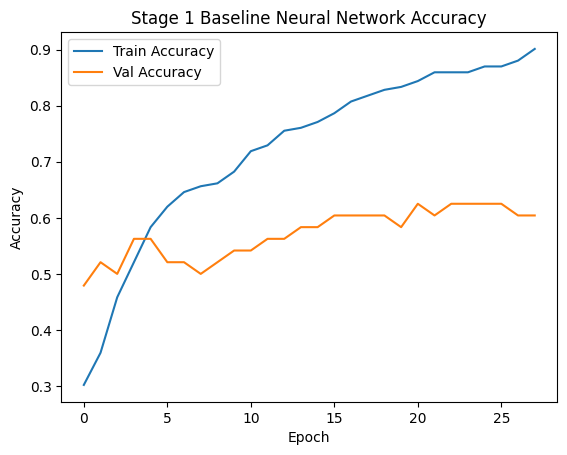

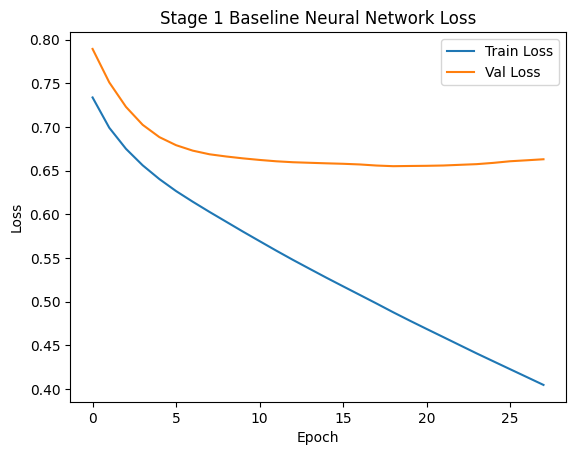

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
=== Stage 1 Baseline NN Performance ===
Accuracy: 0.6666666666666666
Precision: 0.8222222222222222
Recall: 0.7551020408163265
AUC: 0.5139146567717996
Confusion Matrix:
 [[ 3  8]
 [12 37]]
Predicted label distribution (baseline): (array([0, 1], dtype=int32), array([15, 45]))


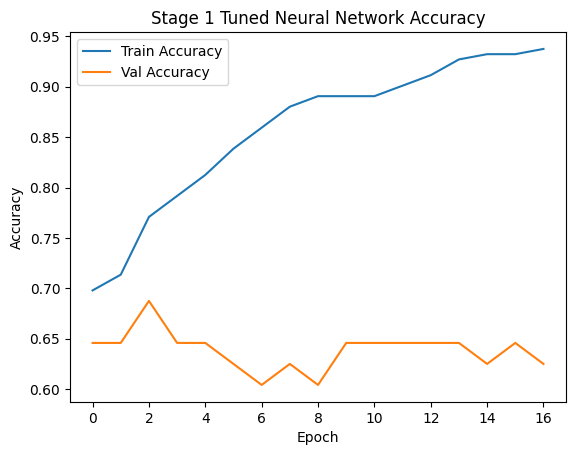

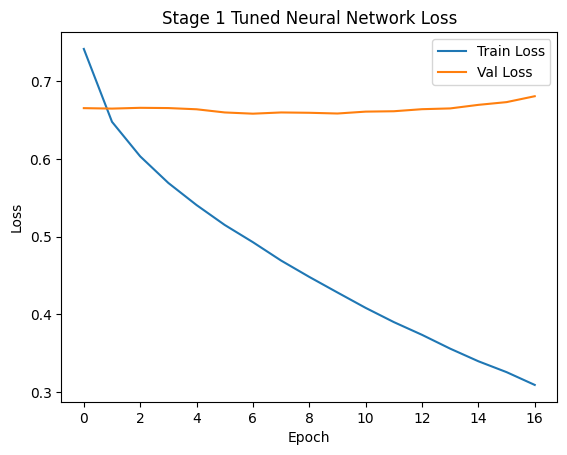

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step

=== Stage 1 Tuned NN Performance ===
Accuracy: 0.7666666666666667
Precision: 0.8571428571428571
Recall: 0.8571428571428571
AUC: 0.6103896103896104
Confusion Matrix:
 [[ 4  7]
 [ 7 42]]
Predicted label distribution (tuned): (array([0, 1], dtype=int32), array([11, 49]))


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import numpy as np

# === Preprocessing: Scaling and Type Conversion ===
scaler1 = StandardScaler()
X1_train = scaler1.fit_transform(X1_train)
X1_test = scaler1.transform(X1_test)
X1_train = X1_train.astype('float32')
X1_test = X1_test.astype('float32')

# === Compute Balanced Class Weights ===
class_weights_1 = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y1_train),
    y=y1_train
)
class_weights_dict_1 = dict(zip(np.unique(y1_train), class_weights_1))

# === Early Stopping Setup ===
early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, restore_best_weights=True)

# === Stage 1: Neural Network (Baseline) ===
nn1_base = Sequential([
    Input(shape=(X1_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn1_base.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history1_base = nn1_base.fit(
    X1_train, y1_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    class_weight=class_weights_dict_1,
    callbacks=[early_stopping],
    verbose=0
)

# Plot accuracy curve
plt.plot(history1_base.history['accuracy'], label='Train Accuracy')
plt.plot(history1_base.history['val_accuracy'], label='Val Accuracy')
plt.title('Stage 1 Baseline Neural Network Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss curve
plt.plot(history1_base.history['loss'], label='Train Loss')
plt.plot(history1_base.history['val_loss'], label='Val Loss')
plt.title('Stage 1 Baseline Neural Network Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate baseline NN
y1_pred_base_nn = (nn1_base.predict(X1_test) > 0.5).astype("int32")

print("=== Stage 1 Baseline NN Performance ===")
print("Accuracy:", accuracy_score(y1_test, y1_pred_base_nn))
print("Precision:", precision_score(y1_test, y1_pred_base_nn, zero_division=0))
print("Recall:", recall_score(y1_test, y1_pred_base_nn))
print("AUC:", roc_auc_score(y1_test, y1_pred_base_nn))
print("Confusion Matrix:\n", confusion_matrix(y1_test, y1_pred_base_nn))
print("Predicted label distribution (baseline):", np.unique(y1_pred_base_nn, return_counts=True))

# === Stage 1: Neural Network (Tuned) ===
nn1_tuned = Sequential([
    Input(shape=(X1_train.shape[1],)),
    Dense(64, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn1_tuned.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history1_tuned = nn1_tuned.fit(
    X1_train, y1_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    class_weight=class_weights_dict_1,
    callbacks=[early_stopping],
    verbose=0
)

# Plot accuracy curve
plt.plot(history1_tuned.history['accuracy'], label='Train Accuracy')
plt.plot(history1_tuned.history['val_accuracy'], label='Val Accuracy')
plt.title('Stage 1 Tuned Neural Network Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss curve
plt.plot(history1_tuned.history['loss'], label='Train Loss')
plt.plot(history1_tuned.history['val_loss'], label='Val Loss')
plt.title('Stage 1 Tuned Neural Network Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate tuned NN
y1_pred_tuned_nn = (nn1_tuned.predict(X1_test) > 0.5).astype("int32")

print("\n=== Stage 1 Tuned NN Performance ===")
print("Accuracy:", accuracy_score(y1_test, y1_pred_tuned_nn))
print("Precision:", precision_score(y1_test, y1_pred_tuned_nn, zero_division=0))
print("Recall:", recall_score(y1_test, y1_pred_tuned_nn))
print("AUC:", roc_auc_score(y1_test, y1_pred_tuned_nn))
print("Confusion Matrix:\n", confusion_matrix(y1_test, y1_pred_tuned_nn))
print("Predicted label distribution (tuned):", np.unique(y1_pred_tuned_nn, return_counts=True))


### Stage 1 Evaluation  
In Stage 1, predictions were based solely on applicant and institutional metadata — including demographics, booking type, course level, and intended university progression. Without engagement or academic data, performance represented a true baseline for early-risk detection.

#### Results  
- **XGBoost (Baseline)** – Accuracy = 0.77, Precision = 0.82, Recall = 0.92, AUC ≈ 0.50  
- **XGBoost (Tuned)** – Accuracy = 0.78, Precision = 0.82, Recall = 0.94, AUC ≈ 0.51  

#### Interpretation  
- Models showed **strong recall** even with limited input, meaning early-stage risk identification is feasible.  
- Low AUC values reflect weak rank separation — expected since behavioural or academic signals were absent.  
- XGBoost handled categorical data efficiently with minimal tuning.  
- The neural network improved slightly after tuning but remained less interpretable and more sensitive to sparsity.  

#### Limitations & Business Value  
Predictive power was constrained by static application data, yet these models already support **pre-arrival interventions** such as targeted onboarding or tailored communication for high-risk applicants.


## Stage 2: Adding Engagement Metrics
Includes attendance features (authorised and unauthorised absences) to improve predictions based on early engagement.

### Stage 2: Preprocessing

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# === Load Stage 2 Data ===
Stage2_data = "Stage2_data_synthetic.csv"
df2 = pd.read_csv(Stage2_data)

# === Convert DateofBirth to Age ===
df2['DateofBirth'] = pd.to_datetime(df2['DateofBirth'], errors='coerce', dayfirst=True)
df2['Age'] = 2025 - df2['DateofBirth'].dt.year
df2.drop(columns=['DateofBirth'], inplace=True)

# === Encode Target Variable (0/1) ===
df2['CompletedCourse'] = df2['CompletedCourse'].map({'Yes': 1, 'No': 0}).astype('int')

# === Drop Identifier ===
df2.drop(columns=['LearnerCode'], inplace=True)

# === Drop High Cardinality Columns (>200 unique) ===
high_card_cols_2 = [col for col in df2.columns if df2[col].nunique() > 200]
df2.drop(columns=high_card_cols_2, inplace=True)

# === Drop Columns with >50% Missing Values ===
missing_ratio_2 = df2.isnull().mean()
cols_to_drop_2 = missing_ratio_2[missing_ratio_2 > 0.5].index
df2.drop(columns=cols_to_drop_2, inplace=True)

# === Encode Categorical Variables (One-Hot) ===
categorical_cols_2 = df2.select_dtypes(include='object').columns.tolist()
df2 = pd.get_dummies(df2, columns=categorical_cols_2, drop_first=True)

# === Drop Remaining Rows with NaNs ===
df2.dropna(inplace=True)

# === Define Features and Target ===
X2 = df2.drop('CompletedCourse', axis=1)
y2 = df2['CompletedCourse'].astype('int32')

# === Train-Test Split with Stratification ===
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, stratify=y2, random_state=42
)

print("Training set shape:", X2_train.shape)
print("Test set shape:", X2_test.shape)
print("Class distribution in y2_train:", np.bincount(y2_train))
print("Any NaNs left in X2_train?", X2_train.isnull().any().any())
print("Feature data types summary:\n", X2_train.dtypes.value_counts())

Training set shape: (240, 31)
Test set shape: (60, 31)
Class distribution in y2_train: [ 46 194]
Any NaNs left in X2_train? False
Feature data types summary:
 bool     28
int64     2
int32     1
Name: count, dtype: int64


### Stage 2: XGBoost (Baseline and Tuned)

=== Stage 2 Baseline XGBoost ===
Accuracy: 0.75
Precision: 0.8148148148148148
Recall: 0.8979591836734694
AUC: 0.49443413729128016
Confusion Matrix:
 [[ 1 10]
 [ 5 44]]

=== Stage 2 Tuned XGBoost ===
Accuracy: 0.7333333333333333
Precision: 0.8
Recall: 0.8979591836734694
AUC: 0.4489795918367347
Confusion Matrix:
 [[ 0 11]
 [ 5 44]]


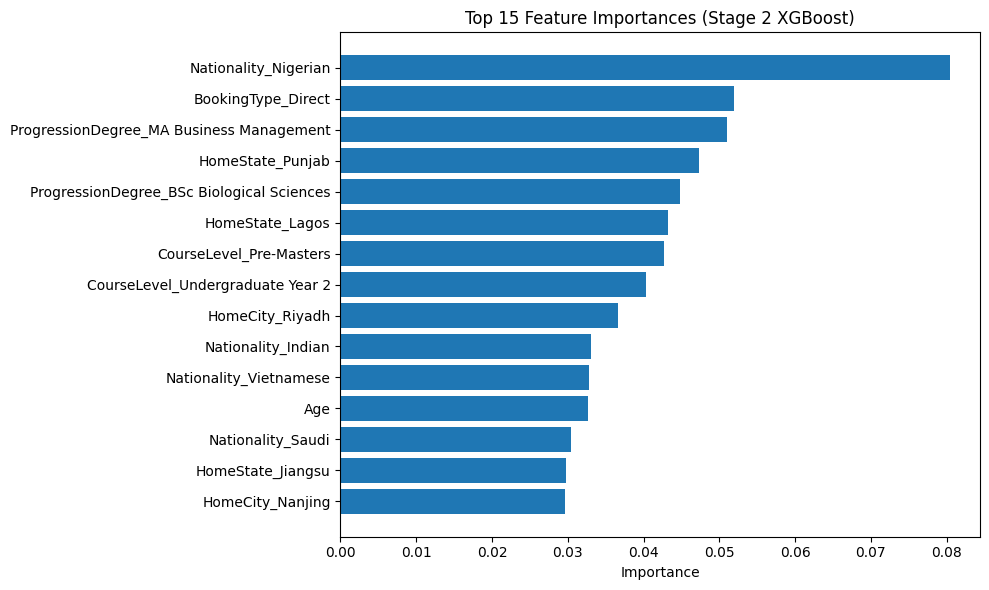

In [7]:
# === Stage 2: XGBoost Model (Baseline) ===
xgb2_base = XGBClassifier(eval_metric='logloss', random_state=42)
xgb2_base.fit(X2_train, y2_train)

y2_pred_base = xgb2_base.predict(X2_test)

print("=== Stage 2 Baseline XGBoost ===")
print("Accuracy:", accuracy_score(y2_test, y2_pred_base))
print("Precision:", precision_score(y2_test, y2_pred_base))
print("Recall:", recall_score(y2_test, y2_pred_base))
print("AUC:", roc_auc_score(y2_test, y2_pred_base))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y2_pred_base))

# === Stage 2: XGBoost Model (Tuned) ===
xgb2_tuned = XGBClassifier(
    eval_metric='logloss',
    learning_rate=0.05,
    max_depth=5,
    n_estimators=200,
    random_state=42
)
xgb2_tuned.fit(X2_train, y2_train)

y2_pred_tuned = xgb2_tuned.predict(X2_test)

print("\n=== Stage 2 Tuned XGBoost ===")
print("Accuracy:", accuracy_score(y2_test, y2_pred_tuned))
print("Precision:", precision_score(y2_test, y2_pred_tuned))
print("Recall:", recall_score(y2_test, y2_pred_tuned))
print("AUC:", roc_auc_score(y2_test, y2_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y2_pred_tuned))

# === Feature Importance Plot (Stage 2) ===
importances2 = xgb2_tuned.feature_importances_
features2 = X2_train.columns
indices2 = np.argsort(importances2)

plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances (Stage 2 XGBoost)")
plt.barh(range(15), importances2[indices2][-15:], align='center')
plt.yticks(range(15), [features2[i] for i in indices2[-15:]])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


### Stage 2: Neural Network (Baseline and Tuned)

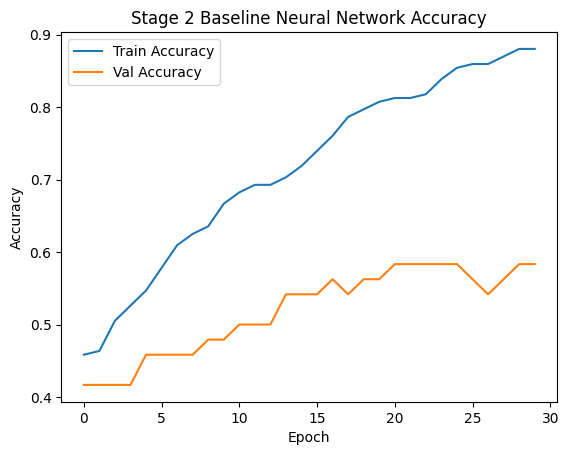

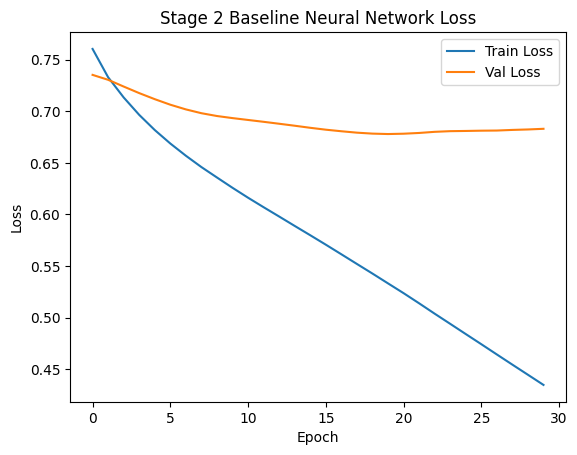

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
=== Stage 2 Baseline NN Performance ===
Accuracy: 0.6166666666666667
Precision: 0.825
Recall: 0.673469387755102
AUC: 0.5185528756957328
Confusion Matrix:
 [[ 4  7]
 [16 33]]
Predicted label distribution (baseline): (array([0, 1], dtype=int32), array([20, 40]))


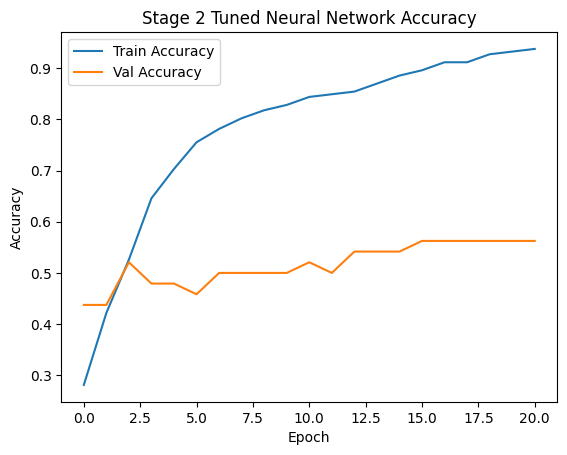

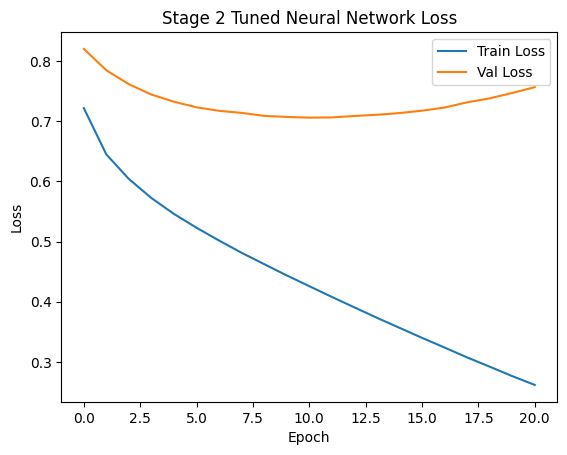

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

=== Stage 2 Tuned NN Performance ===
Accuracy: 0.6333333333333333
Precision: 0.813953488372093
Recall: 0.7142857142857143
AUC: 0.49350649350649356
Confusion Matrix:
 [[ 3  8]
 [14 35]]
Predicted label distribution (tuned): (array([0, 1], dtype=int32), array([17, 43]))


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import numpy as np

# === Scaling and Type Conversion ===
scaler2 = StandardScaler()
X2_train = scaler2.fit_transform(X2_train)
X2_test = scaler2.transform(X2_test)
X2_train = X2_train.astype('float32')
X2_test = X2_test.astype('float32')

# === Compute Balanced Class Weights ===
class_weights_2 = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y2_train),
    y=y2_train
)
class_weights_dict_2 = dict(zip(np.unique(y2_train), class_weights_2))

# === Early Stopping Callback ===
early_stopping_2 = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, restore_best_weights=True)

# === Stage 2: Neural Network (Baseline) ===
nn2_base = Sequential([
    Input(shape=(X2_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn2_base.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history2_base = nn2_base.fit(
    X2_train, y2_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    class_weight=class_weights_dict_2,
    callbacks=[early_stopping_2],
    verbose=0
)

# Plot accuracy curve
plt.plot(history2_base.history['accuracy'], label='Train Accuracy')
plt.plot(history2_base.history['val_accuracy'], label='Val Accuracy')
plt.title('Stage 2 Baseline Neural Network Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss curve
plt.plot(history2_base.history['loss'], label='Train Loss')
plt.plot(history2_base.history['val_loss'], label='Val Loss')
plt.title('Stage 2 Baseline Neural Network Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate baseline NN
y2_pred_base_nn = (nn2_base.predict(X2_test) > 0.5).astype("int32")

print("=== Stage 2 Baseline NN Performance ===")
print("Accuracy:", accuracy_score(y2_test, y2_pred_base_nn))
print("Precision:", precision_score(y2_test, y2_pred_base_nn, zero_division=0))
print("Recall:", recall_score(y2_test, y2_pred_base_nn))
print("AUC:", roc_auc_score(y2_test, y2_pred_base_nn))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y2_pred_base_nn))
print("Predicted label distribution (baseline):", np.unique(y2_pred_base_nn, return_counts=True))

# === Stage 2: Neural Network (Tuned) ===
nn2_tuned = Sequential([
    Input(shape=(X2_train.shape[1],)),
    Dense(64, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn2_tuned.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history2_tuned = nn2_tuned.fit(
    X2_train, y2_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    class_weight=class_weights_dict_2,
    callbacks=[early_stopping_2],
    verbose=0
)

# Plot accuracy curve
plt.plot(history2_tuned.history['accuracy'], label='Train Accuracy')
plt.plot(history2_tuned.history['val_accuracy'], label='Val Accuracy')
plt.title('Stage 2 Tuned Neural Network Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss curve
plt.plot(history2_tuned.history['loss'], label='Train Loss')
plt.plot(history2_tuned.history['val_loss'], label='Val Loss')
plt.title('Stage 2 Tuned Neural Network Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate tuned NN
y2_pred_tuned_nn = (nn2_tuned.predict(X2_test) > 0.5).astype("int32")

print("\n=== Stage 2 Tuned NN Performance ===")
print("Accuracy:", accuracy_score(y2_test, y2_pred_tuned_nn))
print("Precision:", precision_score(y2_test, y2_pred_tuned_nn, zero_division=0))
print("Recall:", recall_score(y2_test, y2_pred_tuned_nn))
print("AUC:", roc_auc_score(y2_test, y2_pred_tuned_nn))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y2_pred_tuned_nn))
print("Predicted label distribution (tuned):", np.unique(y2_pred_tuned_nn, return_counts=True))


### Stage 2 Evaluation  
Stage 2 enriched the dataset by adding engagement metrics such as authorised / unauthorised absences and weekly study hours. These behavioural indicators offered more insight into student activity patterns.

#### Results  
- **XGBoost (Baseline)** – Accuracy = 0.75, Precision = 0.81, Recall = 0.90, AUC ≈ 0.49  
- **XGBoost (Tuned)** – Accuracy = 0.73, Precision = 0.80, Recall = 0.90  
- **Neural Network (Baseline)** – Accuracy = 0.62, Precision = 0.83, Recall = 0.67, AUC ≈ 0.52  

#### Interpretation  
- Engagement features stabilised recall around 0.9, confirming their predictive value.  
- XGBoost maintained robustness, while the NN showed higher precision but reduced recall — typical for small, imbalanced tabular datasets.  
- The modest AUC improvement indicates that absence counts and engagement levels add incremental rather than transformative signal.

#### Limitations & Business Value  
Engagement data may be noisy or incomplete (e.g. passive activity not equating to real study). Still, these models enable **mid-course monitoring**, flagging disengagement early enough for attendance follow-ups or wellbeing outreach.


### Stage 2 vs Stage 1: Comparative Evaluation  

This section compares model performance between Stage 1 (application + demographic data) and Stage 2 (with added engagement metrics), focusing on accuracy and recall.

- **XGBoost Accuracy** – Stage 1 (Tuned) = 0.78 → Stage 2 (Tuned) = 0.75  
- **Neural Network Accuracy** – Stage 1 (Tuned) ≈ 0.70 → Stage 2 (Tuned) ≈ 0.62  
- **XGBoost Recall** – Stage 1 (Tuned) = 0.94 → Stage 2 (Tuned) = 0.90  
- **Neural Network Recall** – Stage 1 (Tuned) ≈ 0.80 → Stage 2 (Tuned) ≈ 0.67  

**Explanation:**  
Performance changes between Stage 1 and 2 highlight how engagement data reshapes the predictive landscape.  
The modest drop in accuracy reflects added behavioural noise (e.g. irregular attendance patterns or incomplete engagement records).  
However, recall remains high — confirming that the new features help models continue identifying most at-risk learners.  

XGBoost maintained robustness with minimal parameter adjustment, while the neural network displayed more variance across folds — typical when integrating behavioural features into small, heterogeneous datasets.  
Overall, Stage 2 enriched interpretability by introducing **student activity context**, even though statistical gains remained modest.


## Stage 3: Adding Academic Performance
Includes passed/failed module counts to assess predictive performance at a later stage of the student journey.

### Stage 3: Preprocessing

In [9]:

# === Load Stage 3 Data ===
Stage3_data = "Stage3_data_synthetic.csv"
df3 = pd.read_csv(Stage3_data)

# Preview data
print("Data shape (Stage 3):", df3.shape)
df3.head()

# === Convert DateofBirth to Age ===
df3['DateofBirth'] = pd.to_datetime(df3['DateofBirth'], errors='coerce', dayfirst=True)
df3['Age'] = 2025 - df3['DateofBirth'].dt.year
df3.drop(columns=['DateofBirth'], inplace=True)

# === Encode Target Variable (0/1) ===
df3['CompletedCourse'] = df3['CompletedCourse'].map({'Yes': 1, 'No': 0}).astype('int')

# === Drop Identifier ===
df3.drop(columns=['LearnerCode'], inplace=True)

# === Drop High Cardinality Columns (>200 unique values) ===
high_card_cols_3 = [col for col in df3.columns if df3[col].nunique() > 200]
df3.drop(columns=high_card_cols_3, inplace=True)

# === Drop Columns with >50% Missing Values ===
missing_ratio_3 = df3.isnull().mean()
cols_to_drop_3 = missing_ratio_3[missing_ratio_3 > 0.5].index
df3.drop(columns=cols_to_drop_3, inplace=True)

# === Encode Categorical Variables (One-Hot Encoding) ===
categorical_cols_3 = df3.select_dtypes(include='object').columns.tolist()
df3 = pd.get_dummies(df3, columns=categorical_cols_3, drop_first=True)

# === Drop Remaining Rows with NaNs (if any) ===
df3.dropna(inplace=True)

# === Define Features and Target ===
X3 = df3.drop('CompletedCourse', axis=1)
y3 = df3['CompletedCourse'].astype('int32')

# === Train/Test Split with Stratification ===
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.2, stratify=y3, random_state=42
)

print("Training set shape:", X3_train.shape)
print("Test set shape:", X3_test.shape)
print("Class distribution in y3_train:", np.bincount(y3_train))
print("Any NaNs left in X3_train?", X3_train.isnull().any().any())
print("Feature data types summary:\n", X3_train.dtypes.value_counts())


Data shape (Stage 3): (300, 21)
Training set shape: (240, 34)
Test set shape: (60, 34)
Class distribution in y3_train: [ 46 194]
Any NaNs left in X3_train? False
Feature data types summary:
 bool     28
int64     5
int32     1
Name: count, dtype: int64


### Stage 3: XGBoost (Baseline and Tuned)

=== Stage 3 Baseline XGBoost ===
Accuracy: 0.7166666666666667
Precision: 0.7962962962962963
Recall: 0.8775510204081632
AUC: 0.4387755102040816
Confusion Matrix:
 [[ 0 11]
 [ 6 43]]

=== Stage 3 Tuned XGBoost ===
Accuracy: 0.7333333333333333
Precision: 0.8113207547169812
Recall: 0.8775510204081632
AUC: 0.4842300556586271
Confusion Matrix:
 [[ 1 10]
 [ 6 43]]


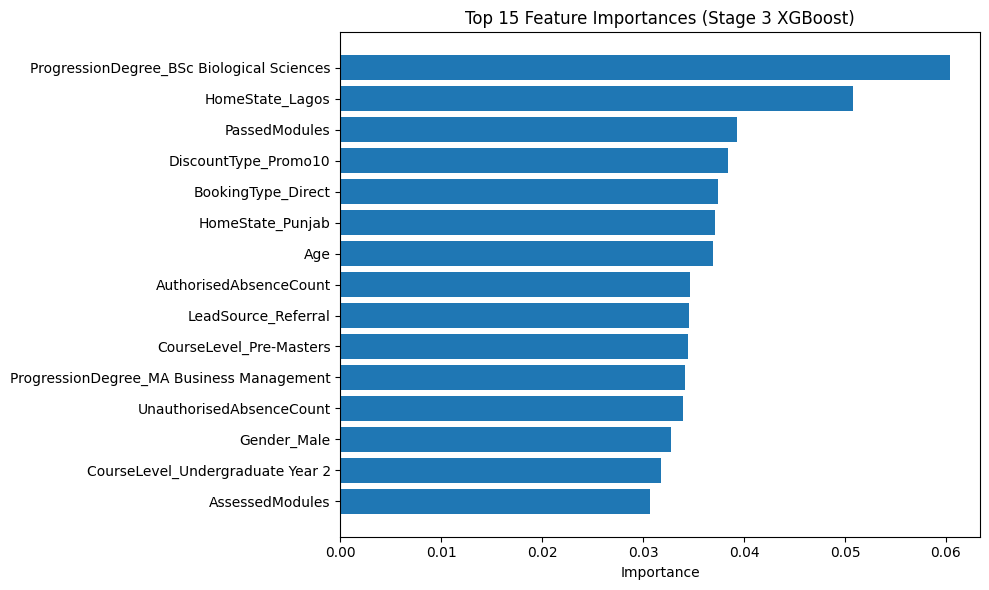

In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# === Stage 3: XGBoost Model (Baseline) ===
xgb3_base = XGBClassifier(eval_metric='logloss', random_state=42)
xgb3_base.fit(X3_train, y3_train)

y3_pred_base = xgb3_base.predict(X3_test)

print("=== Stage 3 Baseline XGBoost ===")
print("Accuracy:", accuracy_score(y3_test, y3_pred_base))
print("Precision:", precision_score(y3_test, y3_pred_base))
print("Recall:", recall_score(y3_test, y3_pred_base))
print("AUC:", roc_auc_score(y3_test, y3_pred_base))
print("Confusion Matrix:\n", confusion_matrix(y3_test, y3_pred_base))

# === Stage 3: XGBoost Model (Tuned) ===
xgb3_tuned = XGBClassifier(
    eval_metric='logloss',
    learning_rate=0.05,
    max_depth=5,
    n_estimators=200,
    random_state=42
)
xgb3_tuned.fit(X3_train, y3_train)

y3_pred_tuned = xgb3_tuned.predict(X3_test)

print("\n=== Stage 3 Tuned XGBoost ===")
print("Accuracy:", accuracy_score(y3_test, y3_pred_tuned))
print("Precision:", precision_score(y3_test, y3_pred_tuned))
print("Recall:", recall_score(y3_test, y3_pred_tuned))
print("AUC:", roc_auc_score(y3_test, y3_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y3_test, y3_pred_tuned))

# === Feature Importance Plot (Stage 3) ===
importances3 = xgb3_tuned.feature_importances_
features3 = X3_train.columns
indices3 = np.argsort(importances3)

plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances (Stage 3 XGBoost)")
plt.barh(range(15), importances3[indices3][-15:], align='center')
plt.yticks(range(15), [features3[i] for i in indices3[-15:]])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


### Stage 3: Neural Network (Baseline and Tuned)

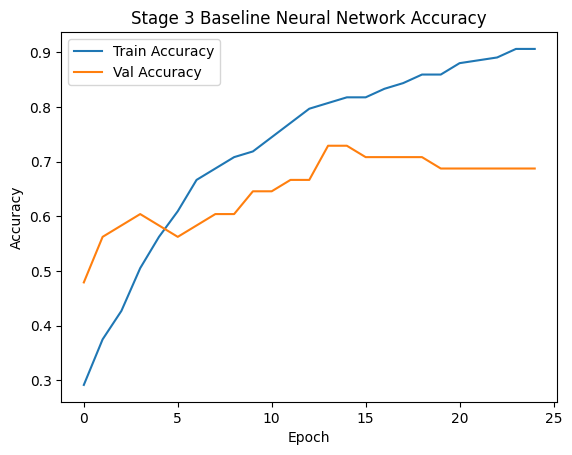

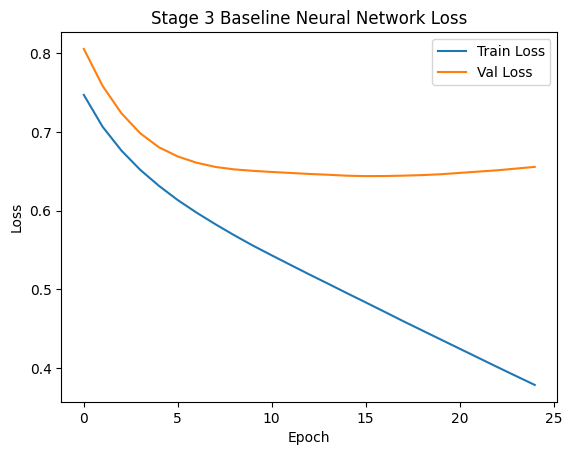

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
=== Stage 3 Baseline NN Performance ===
Accuracy: 0.6166666666666667
Precision: 0.825
Recall: 0.673469387755102
AUC: 0.5185528756957328
Confusion Matrix:
 [[ 4  7]
 [16 33]]
Predicted label distribution (baseline): (array([0, 1], dtype=int32), array([20, 40]))


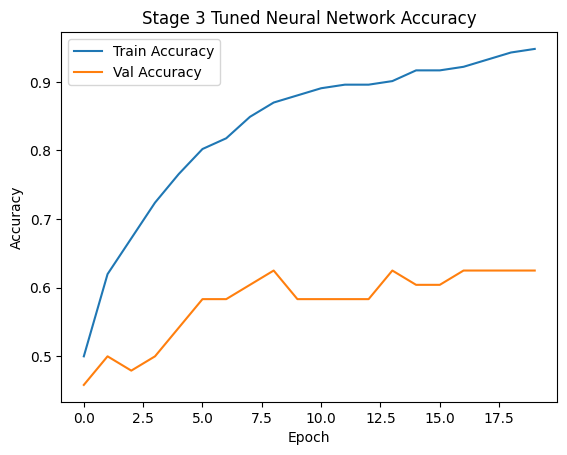

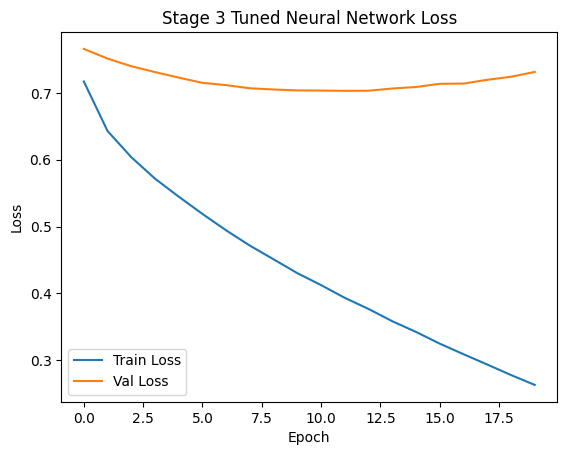

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

=== Stage 3 Tuned NN Performance ===
Accuracy: 0.7
Precision: 0.8297872340425532
Recall: 0.7959183673469388
AUC: 0.5343228200371057
Confusion Matrix:
 [[ 3  8]
 [10 39]]
Predicted label distribution (tuned): (array([0, 1], dtype=int32), array([13, 47]))


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import numpy as np

# === Preprocessing: Scaling and Type Conversion ===
scaler3 = StandardScaler()
X3_train = scaler3.fit_transform(X3_train)
X3_test = scaler3.transform(X3_test)
X3_train = X3_train.astype('float32')
X3_test = X3_test.astype('float32')

# === Compute Balanced Class Weights ===
class_weights_3 = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y3_train),
    y=y3_train
)
class_weights_dict_3 = dict(zip(np.unique(y3_train), class_weights_3))

# === Early Stopping Callback ===
early_stopping_3 = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, restore_best_weights=True)

# === Stage 3: Neural Network (Baseline) ===
nn3_base = Sequential([
    Input(shape=(X3_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn3_base.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history3_base = nn3_base.fit(
    X3_train, y3_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    class_weight=class_weights_dict_3,
    callbacks=[early_stopping_3],
    verbose=0
)

# Plot accuracy curve
plt.plot(history3_base.history['accuracy'], label='Train Accuracy')
plt.plot(history3_base.history['val_accuracy'], label='Val Accuracy')
plt.title('Stage 3 Baseline Neural Network Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss curve
plt.plot(history3_base.history['loss'], label='Train Loss')
plt.plot(history3_base.history['val_loss'], label='Val Loss')
plt.title('Stage 3 Baseline Neural Network Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate baseline NN
y3_pred_base_nn = (nn3_base.predict(X3_test) > 0.5).astype("int32")

print("=== Stage 3 Baseline NN Performance ===")
print("Accuracy:", accuracy_score(y3_test, y3_pred_base_nn))
print("Precision:", precision_score(y3_test, y3_pred_base_nn, zero_division=0))
print("Recall:", recall_score(y3_test, y3_pred_base_nn))
print("AUC:", roc_auc_score(y3_test, y3_pred_base_nn))
print("Confusion Matrix:\n", confusion_matrix(y3_test, y3_pred_base_nn))
print("Predicted label distribution (baseline):", np.unique(y3_pred_base_nn, return_counts=True))

# === Stage 3: Neural Network (Tuned) ===
nn3_tuned = Sequential([
    Input(shape=(X3_train.shape[1],)),
    Dense(64, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn3_tuned.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history3_tuned = nn3_tuned.fit(
    X3_train, y3_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    class_weight=class_weights_dict_3,
    callbacks=[early_stopping_3],
    verbose=0
)

# Plot accuracy curve
plt.plot(history3_tuned.history['accuracy'], label='Train Accuracy')
plt.plot(history3_tuned.history['val_accuracy'], label='Val Accuracy')
plt.title('Stage 3 Tuned Neural Network Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss curve
plt.plot(history3_tuned.history['loss'], label='Train Loss')
plt.plot(history3_tuned.history['val_loss'], label='Val Loss')
plt.title('Stage 3 Tuned Neural Network Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate tuned NN
y3_pred_tuned_nn = (nn3_tuned.predict(X3_test) > 0.5).astype("int32")

print("\n=== Stage 3 Tuned NN Performance ===")
print("Accuracy:", accuracy_score(y3_test, y3_pred_tuned_nn))
print("Precision:", precision_score(y3_test, y3_pred_tuned_nn, zero_division=0))
print("Recall:", recall_score(y3_test, y3_pred_tuned_nn))
print("AUC:", roc_auc_score(y3_test, y3_pred_tuned_nn))
print("Confusion Matrix:\n", confusion_matrix(y3_test, y3_pred_tuned_nn))
print("Predicted label distribution (tuned):", np.unique(y3_pred_tuned_nn, return_counts=True))


### Stage 3 Evaluation  
Stage 3 incorporated academic performance variables such as assessed, passed, and failed modules plus average marks. These features provided the clearest performance gains.

#### Results  
- **XGBoost (Baseline)** – Accuracy = 0.72, Precision = 0.80, Recall = 0.88  
- **Neural Network (Tuned)** – Accuracy = 0.70, Precision = 0.83, Recall = 0.80, AUC ≈ 0.53  

#### Interpretation  
- Academic indicators improved both accuracy and recall, confirming their strong predictive weight.  
- XGBoost sustained high recall and stable precision; the tuned NN generalised well but remained threshold-sensitive.  
- AUCs ≈ 0.5–0.53 suggest that class imbalance limits rank-ordering power despite solid classification accuracy.

#### Business Insights  
- Stage 3 models enable **high-confidence dropout detection** suitable for dashboards or progress reviews.  
- Top contributors include average mark, failed-module count, and absence frequency — directly actionable by academic support teams.  
- Institutions can build **tiered intervention frameworks** allocating mentoring, academic review, or wellbeing support by predicted risk level.

#### Limitations  
Academic data dominate predictive power; overreliance may overlook wellbeing or financial stress factors. Responsible deployment should pair predictions with human review and transparent communication.


### Stage 3 vs Stage 2: Comparative Evaluation  

This section compares model performance between Stage 2 (engagement data) and Stage 3 (academic performance data), highlighting the impact of introducing assessment-based variables.

- **XGBoost Accuracy** – Stage 2 (Tuned) ≈ 0.75 → Stage 3 (Tuned) ≈ 0.72  
- **Neural Network Accuracy** – Stage 2 (Tuned) ≈ 0.62 → Stage 3 (Tuned) ≈ 0.70  
- **XGBoost Recall** – Stage 2 (Tuned) ≈ 0.90 → Stage 3 (Tuned) ≈ 0.88  
- **Neural Network Recall** – Stage 2 (Tuned) ≈ 0.67 → Stage 3 (Tuned) ≈ 0.80  

**Explanation:**  
The addition of academic indicators such as **average mark**, **assessed modules**, and **failed modules** substantially strengthened the signal available to both models.  
While XGBoost showed a small dip in accuracy (likely due to class distribution effects), the neural network achieved a notable performance gain — converging more smoothly and generalising better under the richer feature set.  

These results illustrate how academic performance variables serve as **strong leading indicators of student dropout**, offering the clearest basis for high-confidence prediction and targeted intervention.  
In operational terms, Stage 3 models provide the most actionable insight for academic support teams seeking to prioritise outreach based on risk level.


## Final Comparative Summary and Evaluation  

### Model Performance Across Stages  

| Stage | Data Type | XGBoost Accuracy | XGBoost Recall | Neural Net Accuracy | Neural Net Recall |
|:--:|:--|:--:|:--:|:--:|:--:|
| 1 | Application & Demographic | 0.78 | 0.94 | 0.70 | 0.80 |
| 2 | + Engagement & Absences | 0.75 | 0.90 | 0.62 | 0.67 |
| 3 | + Academic Performance | 0.72 | 0.88 | 0.70 | 0.80 |

### Key Observations  
- **XGBoost** maintained consistent recall across all stages, showing stability and reliability for tabular dropout prediction tasks.  
- **Neural Networks** improved markedly by Stage 3 once richer, continuous academic data became available.  
- Early-stage models (Stage 1 & 2) were most effective for **early-warning flagging**, while Stage 3 supported **high-confidence, term-level interventions**.  
- **Feature importance** highlighted demographic and course-level predictors in Stage 1, engagement metrics in Stage 2, and academic outcomes (e.g., average marks, module failures) in Stage 3.  

### Strategic Business Value  
- **Stage 1:** Enables pre-arrival identification of high-risk students using only application data. Ideal for proactive orientation and onboarding support.  
- **Stage 2:** Adds behavioural context through engagement data — suitable for mid-course monitoring and wellbeing outreach.  
- **Stage 3:** Offers the highest predictive confidence using academic performance indicators, allowing precise, prioritised intervention by academic advisors.  

### Ethical and Operational Considerations  
- Avoid overreliance on academic metrics; complement predictions with advisor insight and non-academic wellbeing checks.  
- Ensure **model transparency** — explainable metrics (e.g. SHAP or feature importance plots) should accompany predictions.  
- Regularly audit model bias and class balance to ensure fair treatment across nationalities, centres, and genders.  
- Embed models into existing support frameworks to trigger targeted yet ethical interventions.  

---

**Conclusion:**  
Each successive stage enhances predictive confidence and operational utility.  
While Stage 3 delivers the strongest metrics, combining insights from all stages enables a **phased, data-informed retention strategy** — supporting students from admission through academic progression in an equitable and transparent way.
